In [15]:
!pip install rho-plus

# Introduction to Machine Learning: a Practical Demonstration

We'll be using the Palmer penguin dataset. (You'll get plenty of experience with materials soon enough, but let's start with something we all have some intuition about.)


Here's a couple pictures of what the different species look like. (They're cuter than semiconductors!)

Adélie:
![Adelie](https://upload.wikimedia.org/wikipedia/commons/thumb/2/21/Adelie_Penguin_%28Pygoscelis_adeliae%29_-_Flickr_-_Gregory_%22Slobirdr%22_Smith.jpg/640px-Adelie_Penguin_%28Pygoscelis_adeliae%29_-_Flickr_-_Gregory_%22Slobirdr%22_Smith.jpg)

Chinstrap:
![Chinstrap](https://upload.wikimedia.org/wikipedia/commons/thumb/6/64/Z%C3%BCgelpinguine_%282%29_%28Pygoscelis_antarcticus%29.jpg/640px-Z%C3%BCgelpinguine_%282%29_%28Pygoscelis_antarcticus%29.jpg)

Gentoo:
![Gentoo](https://upload.wikimedia.org/wikipedia/commons/thumb/4/41/2020-11_Kerguelen_Islands_-_Gentoo_penguin_16.jpg/640px-2020-11_Kerguelen_Islands_-_Gentoo_penguin_16.jpg)

Let's start by trying to predict the species of penguin from its measurements. That's a classification problem.

In [18]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import rho_plus as rp

# if you want dark mode, use is_dark=True instead
theme, cs = rp.mpl_setup(is_dark=False)

# context='talk' makes the text big so it's easy to see
# for your work, you may want to set this to 'notebook' instead
sns.set_context('talk')

In [19]:
df = sns.load_dataset('penguins')
# drop rows with nulls: we don't need them
df = df.dropna()
df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male
...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,Female
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


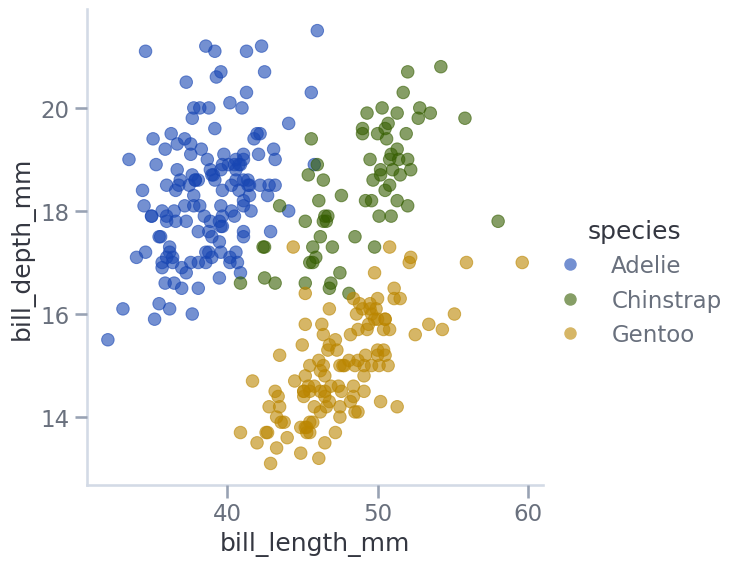

In [20]:
sns.relplot(df, x='bill_length_mm', y='bill_depth_mm', hue='species',
            ec=None, alpha=0.6, height=6)  # <- this is just some styling

# if you want to see all of the different features in the dataset
# will make 16 plots!
# sns.pairplot(df, hue='species')

In [26]:
# X = df[['body_mass_g', 'bill_length_mm', 'bill_depth_mm', 'flipper_length_mm']]
X = df[['bill_length_mm', 'bill_depth_mm']]
y = df['species']

In [39]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor

model = RandomForestClassifier(n_estimators=100)

model.fit(X, y)
model.score(X, y) # accuracy

1.0

In [51]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)

model.fit(X_train, y_train)
model.score(X_test, y_test)

0.9523809523809523

In [59]:
from sklearn.model_selection import train_test_split, cross_val_predict, cross_val_score

cross_val_score(model, X, y).mean()

0.9668928086838534

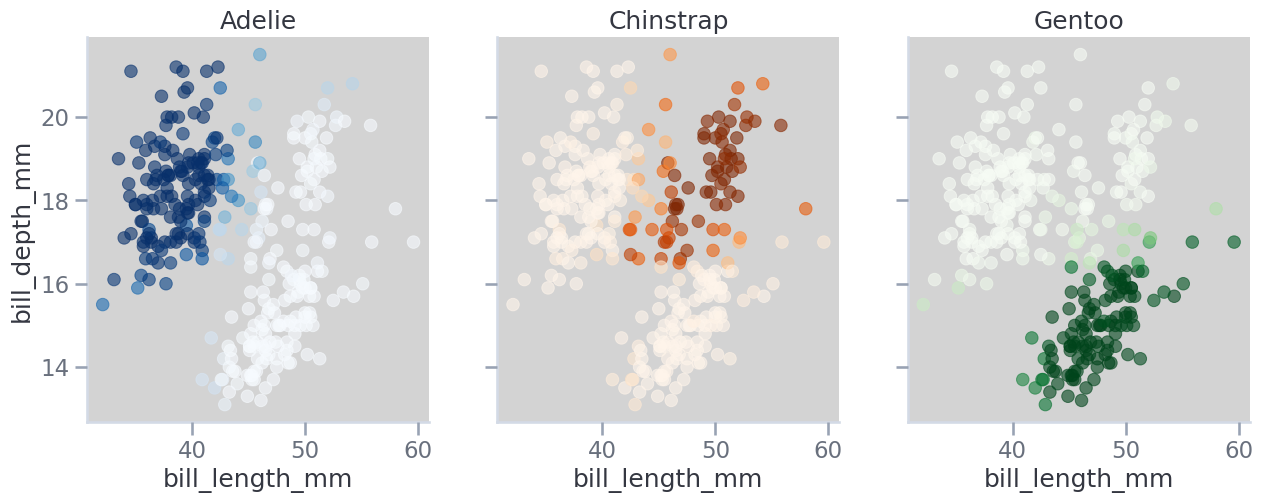

In [8]:
y_probs = cross_val_predict(model, X, y, method='predict_proba')


fig, axs = plt.subplots(1, 3, figsize=(15, 5), sharex=True, sharey=True)

cmaps = ['Blues', 'Oranges', 'Greens']

for ax, probs, species, cmap in zip(axs, y_probs.T, model.classes_, cmaps):
    ax.set_facecolor('lightgray')
    ax.set_title(species)
    sns.despine(ax=ax)
    sns.scatterplot(df, x='bill_length_mm', y='bill_depth_mm', hue=probs, ax=ax,
                    palette=cmap, alpha=0.6, legend=None, ec=None)

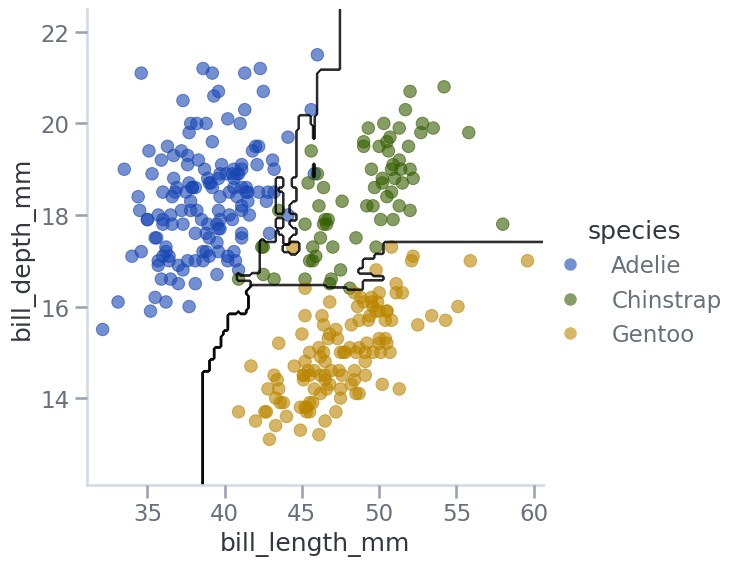

In [9]:
from sklearn.inspection import DecisionBoundaryDisplay


g = sns.relplot(df, x='bill_length_mm', y='bill_depth_mm', hue='species', ec=None, alpha=0.6, height=6)

disp = DecisionBoundaryDisplay.from_estimator(
    model, X, grid_resolution=200, plot_method='contour', ax=g.ax,
    colors=['k', 'k', 'k'], linewidths=0.5)

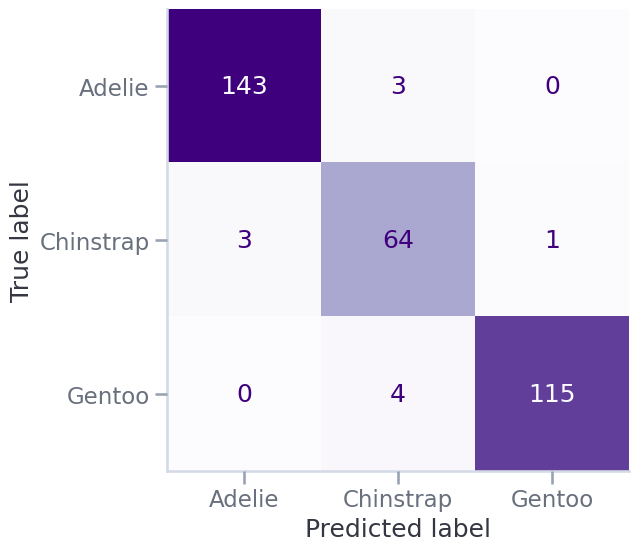

In [57]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

yhat = cross_val_predict(model, X, y)

conf_mat = confusion_matrix(y, yhat)

display = ConfusionMatrixDisplay(conf_mat, display_labels=model.classes_)
display.plot(cmap='Purples', colorbar=False)

# Regression

In [60]:
df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male
...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,Female
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


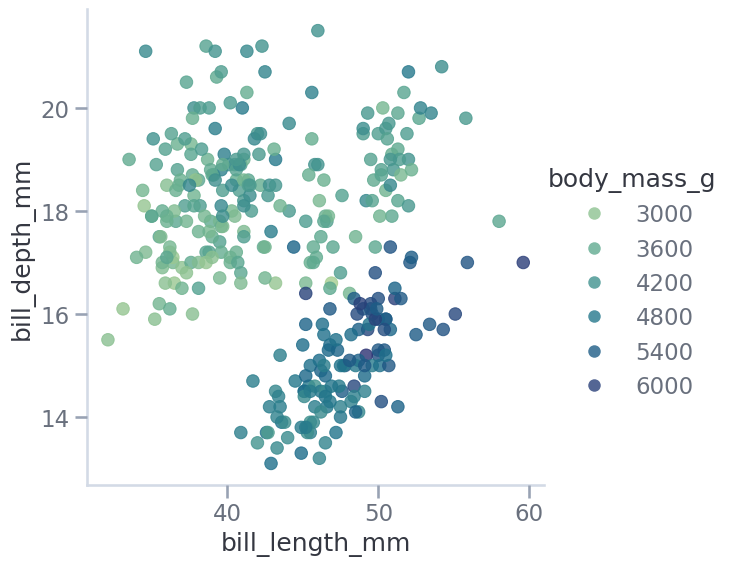

In [62]:
sns.relplot(df, x='bill_length_mm', y='bill_depth_mm', hue='body_mass_g', ec=None, alpha=0.8, height=6,
            palette='crest')

In [83]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

X = df[['bill_length_mm', 'bill_depth_mm', 'species']]
y = df['body_mass_g']

transform = ColumnTransformer([
    ('scaler', StandardScaler(), ['bill_length_mm', 'bill_depth_mm']),
    ('onehot', OneHotEncoder(), ['species'])
])
pipe = make_pipeline(
    transform,
    RandomForestRegressor(n_estimators=100)
)

yhat = cross_val_predict(pipe, X, y, cv=5)

In [82]:
print(f'Root Mean Squared Error (RMSE):\t{np.sqrt(((y - yhat) ** 2).mean()):.4f}')
print(f'Mean Absolute Error (MAE):\t{np.abs(y - yhat).mean():.4f}')
print(f'Explained Variance (R^2):\t{r2_score(y, yhat):.2%}')

Root Mean Squared Error (RMSE):	376.5115
Mean Absolute Error (MAE):	294.9075
Explained Variance (R^2):	78.07%


In [84]:
transform.fit_transform(X)

array([[-0.89604189,  0.7807321 ,  1.        ,  0.        ,  0.        ],
       [-0.82278787,  0.11958397,  1.        ,  0.        ,  0.        ],
       [-0.67627982,  0.42472926,  1.        ,  0.        ,  0.        ],
       ...,
       [ 1.17338426, -0.74499437,  0.        ,  0.        ,  1.        ],
       [ 0.22108196, -1.20271231,  0.        ,  0.        ,  1.        ],
       [ 1.08181673, -0.54156417,  0.        ,  0.        ,  1.        ]])

Text(0, 0.5, 'True')

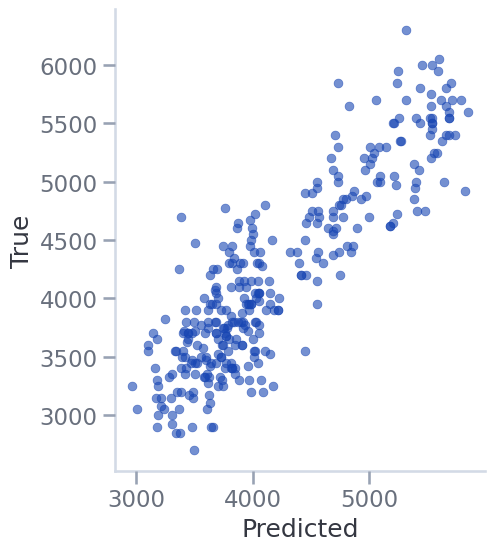

In [87]:
ax = sns.scatterplot(x=yhat, y=y, ec=None, s=40, alpha=0.6)
ax.set_aspect('equal')
sns.despine(ax=ax)
ax.set_xlabel('Predicted')
ax.set_ylabel('True')